In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os
import sys
import h5py
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
os.environ["CUDA_VISIBLE_DEVICES"] = "3"

In [4]:
import cupy as cp

In [5]:
PROJECT_PATH = '../'
DATA_DIR = "/home/swei20/LV/data/"
PCA_PATH = '/scratch/ceph/dobos/data/pfsspec/import/stellar/rbf/bosz_5000_full/pca/spectra.h5'
NORM_PATH = "/scratch/ceph/szalay/swei20/AE/norm_flux_step4.h5"
sys.path.insert(0, PROJECT_PATH)

### Load data

In [6]:
with h5py.File(NORM_PATH, 'r') as f:
    flux0 = f['flux'][()]
    para0 = f['para'][()]
    wave0 = f['wave'][()]

In [7]:
flux0.shape, wave0.shape

((116614, 3850), (3850,))

In [8]:
from lv.base.dataloader_c import DataLoader

In [51]:
ds = DataLoader()

In [52]:
ds.prepare_data (flux0, wave0, para0, "Infrared", "BlueHB", fix_CO=0)

Cupy flux: 1800, wave: 1214


# find masking 

In [53]:
u,w,v = ds._svd(ds.flux)

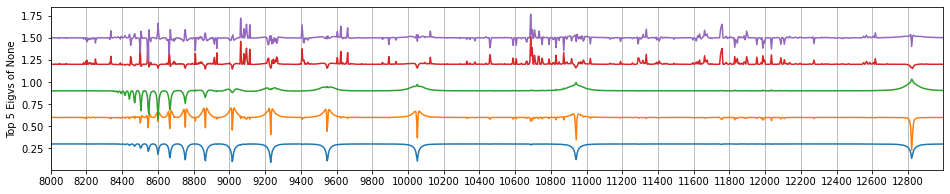

In [54]:
ds.plot_eigv(cp.asnumpy(v))

In [97]:
k,q,prom = 3, 0.6, 0.005
nvv= ds.get_peaks(k=k,q=q,prom=prom, out=1)

Text(0.5, 1.0, 'k=3, q=0.6, prom=0.005')

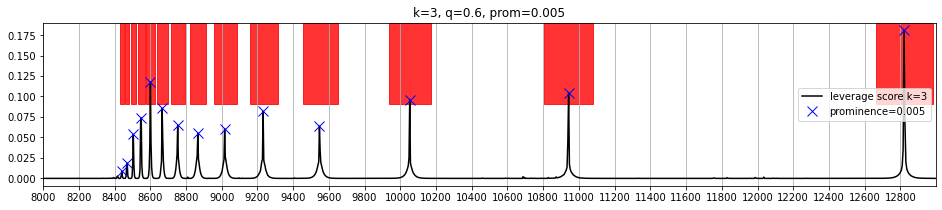

In [98]:
ds.plot_peaks(nvv, k, prom)
plt.title(f"k={k}, q={q}, prom={prom}")

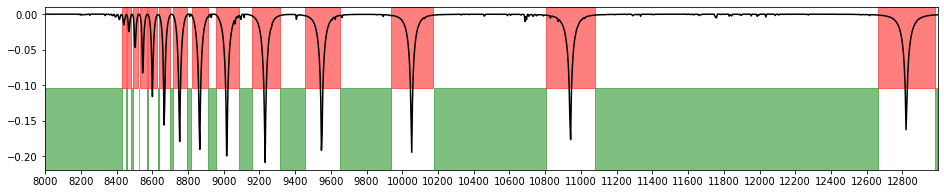

In [99]:
ds.plot_MN_mask(v[:1])

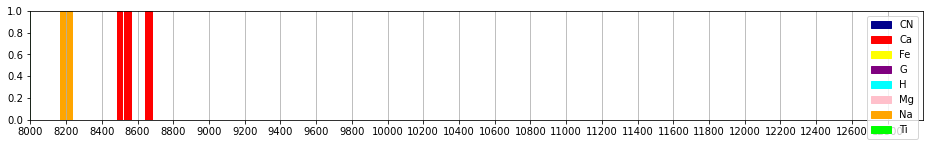

In [75]:
ds.plot_lick()

In [100]:
ds.get_MN(ds.mask, top=5)

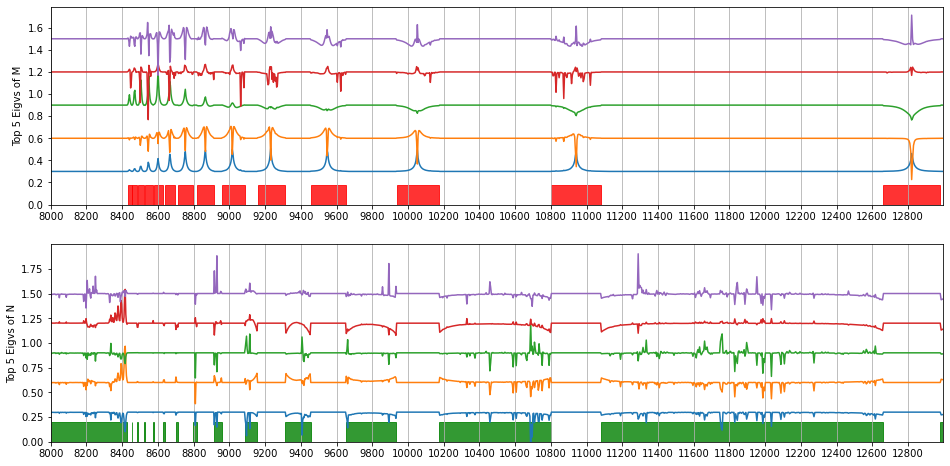

In [101]:
f, axs = plt.subplots(2,1,figsize=(16,8), facecolor="w")
ds.plot_MN(step=0.3, axs=axs)

In [102]:
ML, MS, MLv, MSv = ds._pcp(ds.M, delta=1e-6, mu=None, lam=None, norm=None, maxiter=1000)

11.904473 0.023570226039551584 8972.066


KeyboardInterrupt: 

In [ ]:
f, axs = plt.subplots(2,1,figsize=(16,8), facecolor="w")
ds.plot_eigv(MLv, name="ML", ax=axs[0])
ds.plot_eigv(MSv, name="MS", ax=axs[1])

(6565.0, 6570.0)

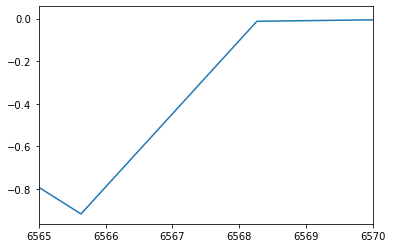

In [59]:
plt.plot(ds.nwave, cp.asnumpy(MSv[0]))
plt.xlim(6565,6570)

In [ ]:
NL, NS, NLv, NSv = ds._pcp(ds.N, delta=1e-6, mu=None, lam=None, norm=None, maxiter=1000)

In [ ]:
f, axs = plt.subplots(2,1,figsize=(16,8), facecolor="w")
ds.plot_eigv(NLv, name="NL", ax=axs[0])
ds.plot_eigv(NSv, name="NS", ax=axs[1])

In [ ]:
ds.pcp_transform(MLv, MSv, NLv, NSv)

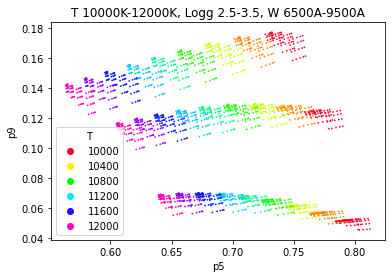

In [40]:
ds.p(5,9,"T",large=0)

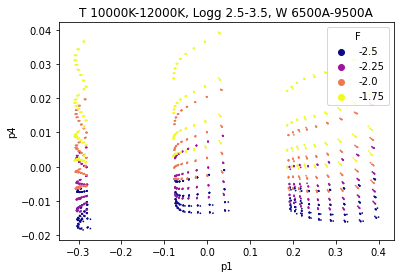

In [41]:
ds.p(1,4,"F")

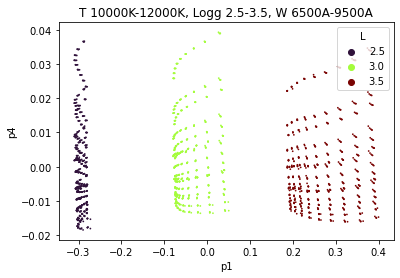

In [42]:
ds.p(1,4,"L")

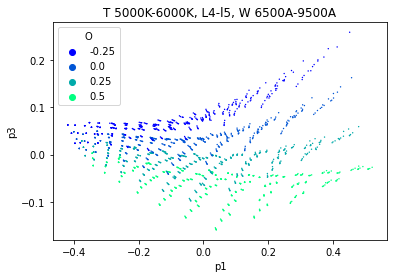

In [71]:
ds.p(1,3,"O")

In [ ]:
ds.p(0,4,"F")

In [ ]:
for p in ["F","T","L","C","O"]:
    for i in range(4):
        ds.pp(i, p)

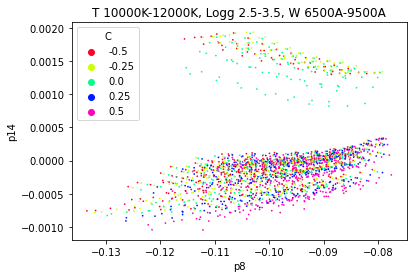

In [43]:
ds.p(8,14,"C")

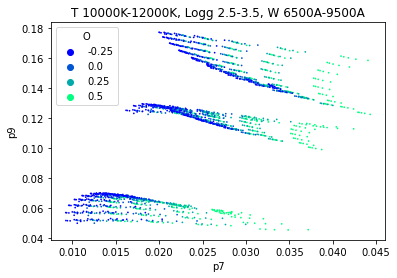

In [50]:
ds.p(7,9,"O")

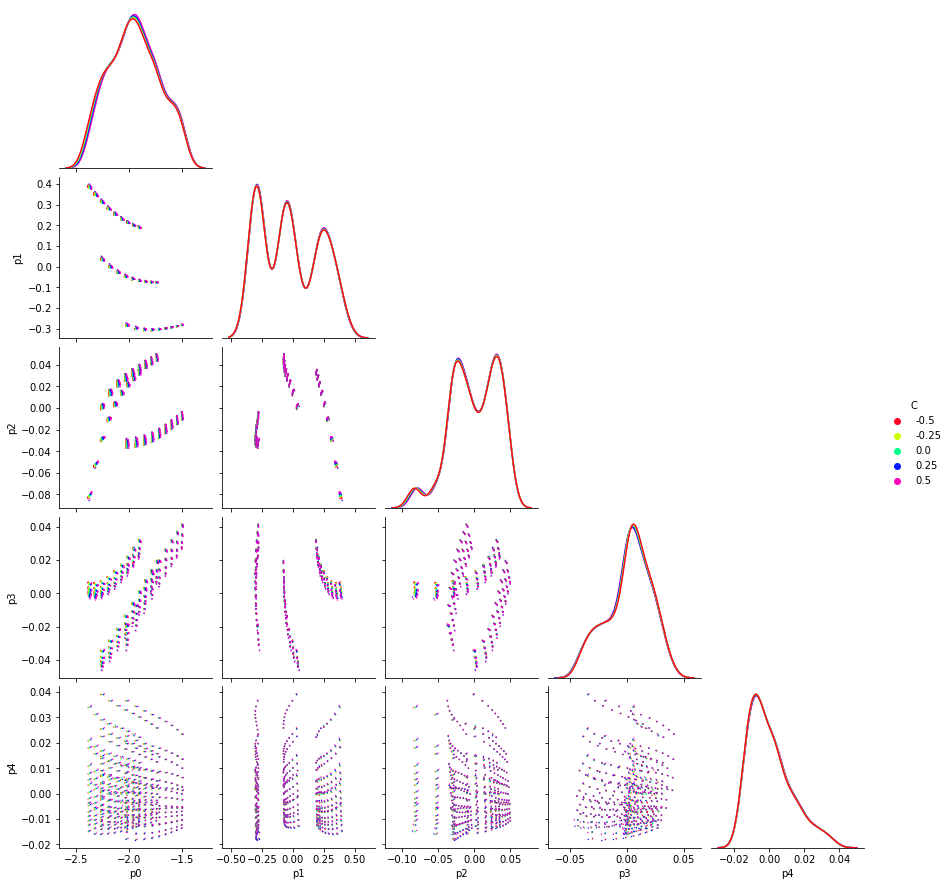

In [28]:
ds.pp(0,"C")

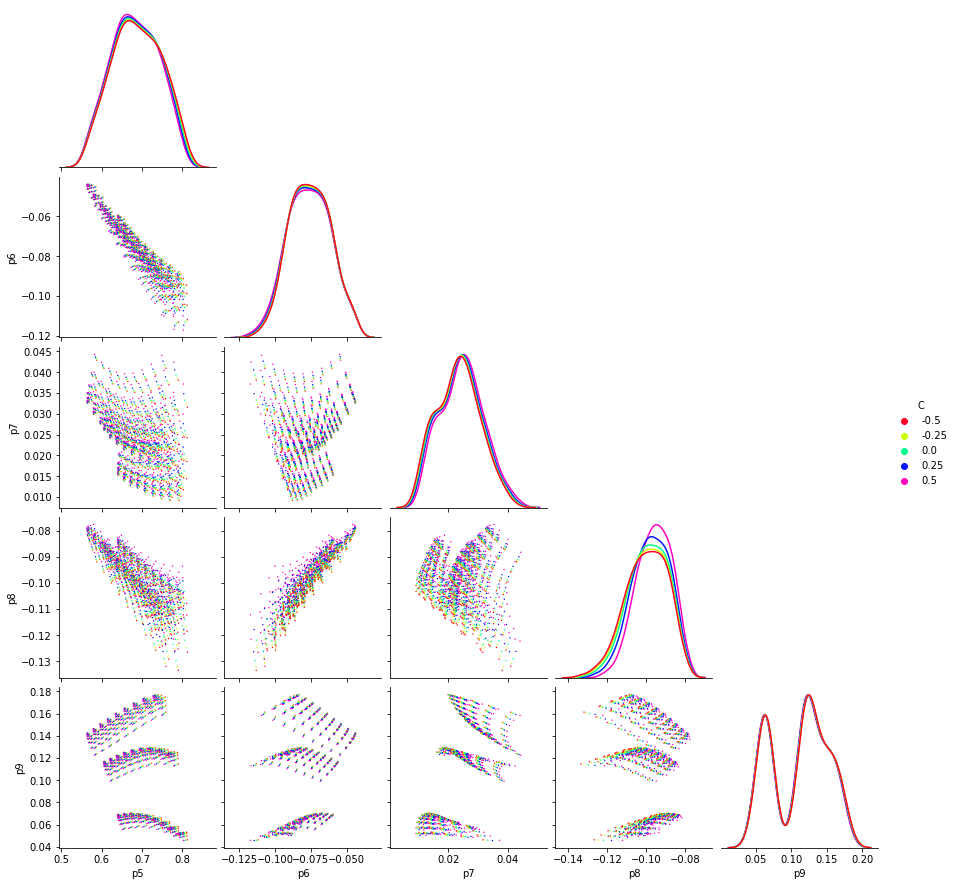

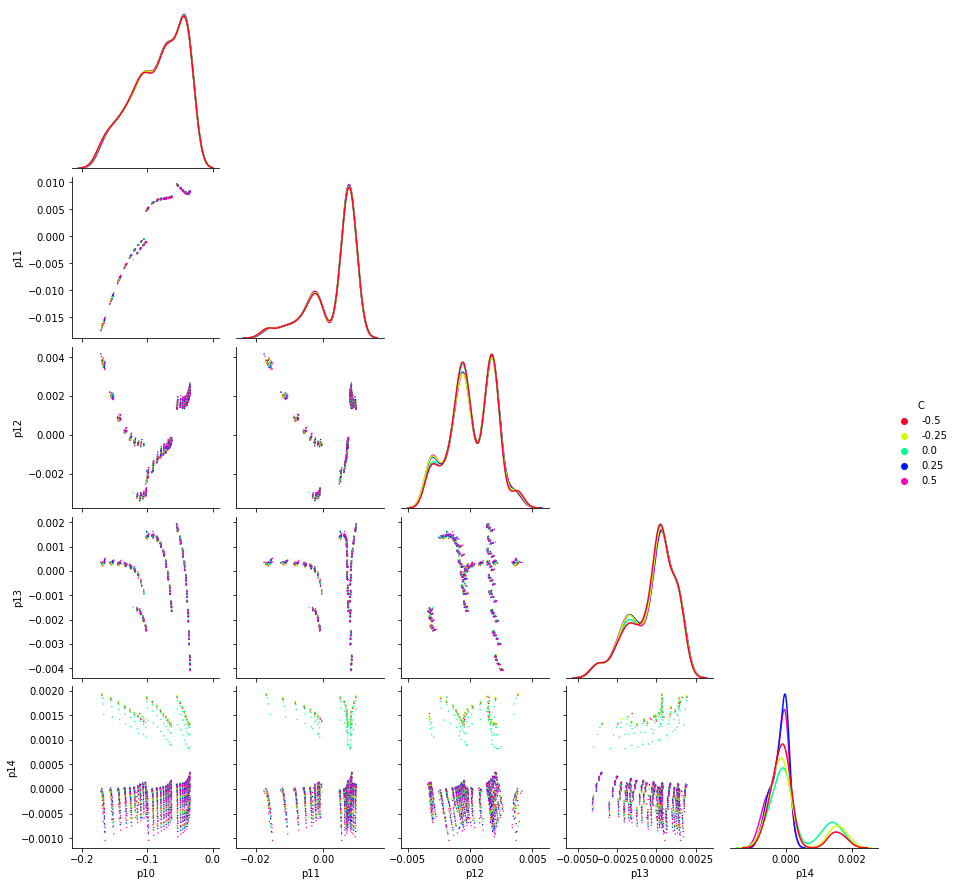

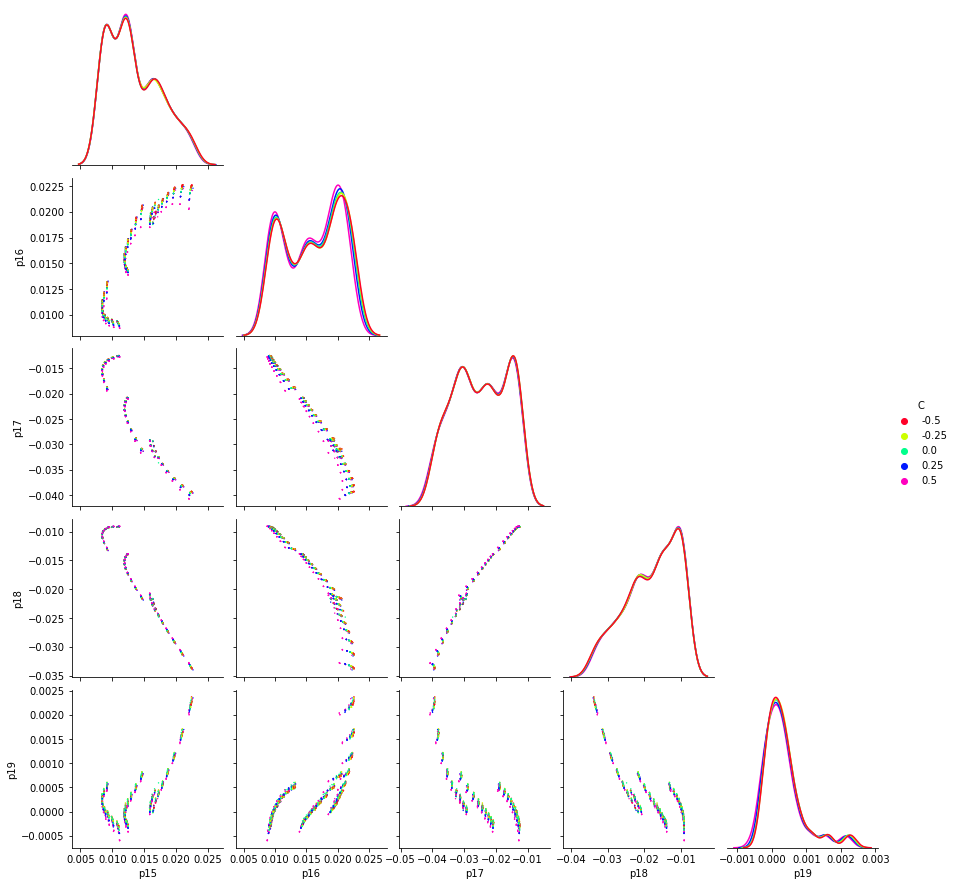

In [29]:
for i in range(1,4):
    ds.pp(i,"C")    

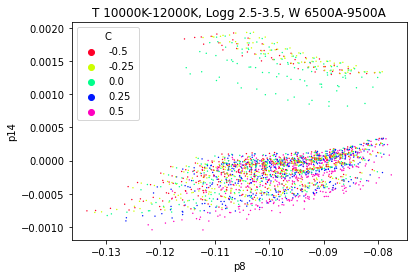

In [30]:
ds.p(8,14,"C")

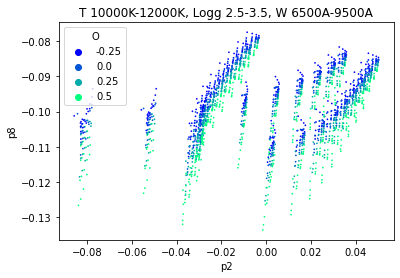

In [44]:
ds.p(2,8,"O")